Подолу е даден описот на базата на податоци која се користи во прашањата во овој тест.

**\--------------------------------------------------------------------------**

<span style="font-size: 0.9375rem;">На сликата подолу е прикажан дел од ЕР дијаграм за систем за организација на саеми за книги.</span>

<span style="font-size: 0.9375rem;">За секој саем на книга се чуваат информации за името на саемот, времетраењето (во денови) и локацијата. Саемот секогаш се одржува на иста локација, но повеќе различни саеми може да се одржат на иста локација со текот на времето. За секоја локација се чуваат детали за име, адреса, капацитет и тип.</span>

<span style="font-size: 0.9375rem;">Саемите на книга се одржуваат на годишно ниво, а за секој одржан саем се познати почетниот датум, како и авторите кои учествувале. За секој автор се чуваат информации за неговото артистичко име и националност. Авторите може да соработуваат со издавачи (за издавачите се знаат името и спонзорите на тој издавач). За секоја соработка се следат датумот на почеток и крај на соработката помеѓу тој автор и издавачот. Авторите можат да ги менуваат издавачите со кои соработуваат со текот на времето.</span>

<span style="font-size: 0.9375rem;">За секој одржан саем на книгата, се чуваат информации за тоа кој автор го претставувал кој издавач, заедно со насловот на книгата што ја промовирале и оценката добиена од публиката за нивната презентација. На истиот саем, еден автор може да промовира различни книги од различни издавачи.<br></span>

| <br> |  | 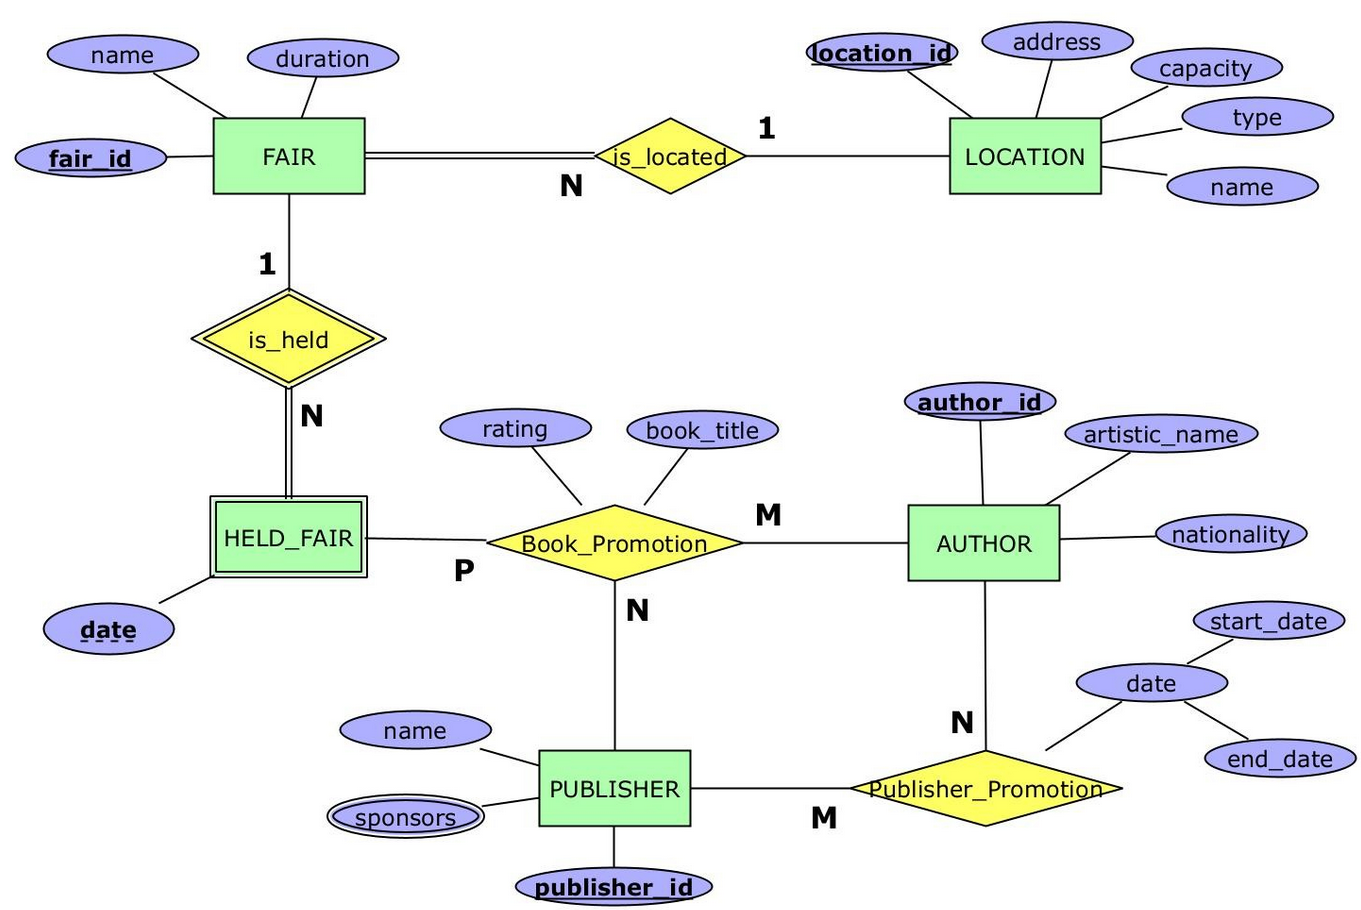<br><br>Релационата база е дефинирана преку следните релации: <br>Location(<u>location\_id</u>, name, address, capacity, type)<br>Fair(<u>fair\_id</u>, name, duration, location\_id\*)<br>Held\_Fair(<u>fair\_id\*, date</u>)Author(<u>author\_id</u>, artistic\_name, nationality)<br>Publisher(<u>publisher\_id</u>, name)<br>Publisher\_Sponsor(<u>publisher\_id\*, sponsor</u>)<br>Publisher\_Promotion(<u>author\_id\*, publisher\_id\*, start\_date,</u> end\_date)<br>Book\_Promotion(<u>fair\_id\*, date\*, publisher\_id\*, author\_id\*,</u> book\_title, rating) |
| --- | --- | --- |

<span style="color: var(--vscode-foreground);"><b>1.</b> Да се напише DML израз со кој ќе се </span> **излистаат**  **индексот на авторот, името на авторот и бројот на саеми на кои авторот има презентирано книги кои се карактеризираат со рејтинг помал од 6.**

In [ ]:
select auth.author_id, auth.artistic_name, count(*) as 'number_of_fairs'
from Author auth
join Book_Promotion bp 
    on bp.author_id = auth.author_id
join Held_Fair hf
    on hf.fair_id = bp.fair_id and bp.date = hf.date

where bp.rating < 6

group by auth.author_id, auth.artistic_name
having count(*) > 1

| Test | Expected | Got |  |
| --- | --- | --- | --- |
|    | 
```
-- Testing with original db
```
 | 
```
author_id   artistic_name  number_of_fairs
----------  -------------  ---------------
2           Jane Smith     2
9           George King    2
```
 | 
```
author_id   artistic_name  number_of_fairs
----------  -------------  ---------------
2           Jane Smith     2
9           George King    2
```
 |

**2.** Да се напише DML израз со кој ќе се **излистаат информациита за сите саеми кои се одржувале на локации со капацитет поголем од 1000. Притоа треба да се прикаќат информациите за името на саемот, локацијата на која е одрќан саемот, како и бројот на книги кои биле промовирани/презентирани на тој саем. Резултатот треба да биде потреден според бројот на презентирани книги во растечки редослед.**

In [ ]:
select f.name as 'fiar_name', loc.name as 'location_name', count(bp.book_title) as 'book_count'
from Fair f

join Location loc
    on loc.location_id = f.location_id

join Book_Promotion bp
    on bp.fair_id = f.fair_id

where loc.capacity > 1000

group by f.name, loc.name
order by book_count

| Test | Expected | Got |  |
| --- | --- | --- | --- |
|    | 
```
-- Testing with original db
```
 | 
```
fiar_name                location_name       book_count
-----------------------  ------------------  ----------
Autumn Writers’ Retreat  Riverside Pavilion  2
Tech Meets Literature    Expo Hall 2         4
Book Expo 2025           Main Hall           6
World Book Fair 2025     Central Arena       6
Literary Fest            Outdoor Pavilion    7
Summer Literature Festi  Outdoor Pavilion    8
International Book Fair  Main Hall           9
```
 | 
```
fiar_name                location_name       book_count
-----------------------  ------------------  ----------
Autumn Writers’ Retreat  Riverside Pavilion  2
Tech Meets Literature    Expo Hall 2         4
Book Expo 2025           Main Hall           6
World Book Fair 2025     Central Arena       6
Literary Fest            Outdoor Pavilion    7
Summer Literature Festi  Outdoor Pavilion    8
International Book Fair  Main Hall           9
```
 |

**3.** Да се напише DML израз со кој ќе се излистаат **насловите на книгите кои се изложени на саеми чии што издавач има повеќе од 3 спонзори. Насловите на книгите потребно е да бидат сортирани во растечки редослед.**

In [ ]:
select bp.book_title
from Book_Promotion bp

join Publisher_Sponsor ps
    on ps.publisher_id = bp.publisher_id

group by bp.book_title
having count(*) > 3

| Test | Expected | Got |  |
| --- | --- | --- | --- |
|    | 
```
-- Testing with original db
```
 | 
```
book_title
---------------------------------------
Echoes from the Past-Historical Fiction
Secrets of the Seas-Adventure
Silent Whispers-Horror
Silent Wishes-Romance
The Broken Mirror-Fantasy
The Call of the Sea-Adventure
The Dragon's Awakening-Fantasy
The Timeless City-Science Fiction
```
 | 
```
book_title
---------------------------------------
Echoes from the Past-Historical Fiction
Secrets of the Seas-Adventure
Silent Whispers-Horror
Silent Wishes-Romance
The Broken Mirror-Fantasy
The Call of the Sea-Adventure
The Dragon's Awakening-Fantasy
The Timeless City-Science Fiction
```
 |

**4.** Да се напише DML израз со кој ќе се излистаат **индексите на авторите и имињата на авторите кои се поддржани од издавачи со најголем број на спонзори.**

In [ ]:
select auth.author_id, auth.artistic_name
from author auth

join Publisher_Promotion pp
    on pp.author_id = auth.author_id

join Publisher_Sponsor ps
    on ps.publisher_id = pp.publisher_id

group by auth.author_id, auth.artistic_name, ps.publisher_id
having count(ps.sponsor) = (
    select max(count)
    from (
        select count(sponsor) as 'count'
        from Publisher_Sponsor
        group by publisher_id
    )
);

| Test | Expected | Got |  |
| --- | --- | --- | --- |
|    | 
```
-- Testing with original db
```
 | 
```
author_id   artistic_name
----------  -------------
4           Alice Winters
6           Clara Tan
```
 | 
```
author_id   artistic_name
----------  -------------
4           Alice Winters
6           Clara Tan
```
 |

**5.** <span id="docs-internal-guid-4d3188cd-7fff-7b5e-e705-142d9b96a809" style="color: var(--vscode-foreground);">Да се напише DML израз со кој ќе се излистаат</span> **имињата на сите книги кои се презентирани на саем кој што се изведува на затворена локација (INDOOR) која има најголем капацитет за гости.Имињата на книгите треба да бидат сортирани во растечки редослед.**

In [ ]:
with tmp as(
    select hf.fair_id, max(loc.capacity)
    from Location loc
    
    join Fair f
        on loc.location_id = f.location_id

    join Held_Fair hf
        on hf.fair_id = f.fair_id

    where loc.type = 'INDOOR'
)

select bp.book_title
from tmp t

join Book_Promotion bp
    on bp.fair_id = t.fair_id

join Author auth
    on auth.author_id = bp.author_id

order by bp.book_title asc

| Test | Expected | Got |  |
| --- | --- | --- | --- |
|    | 
```
-- Testing with original db
```
 | 
```
book_title
-------------------
Fading Light-Horror
Rise from the Ashes
The Adventure of Li
The Last Word-Myste
The Silent Journey-
Uncharted Realms-Fa
```
 | 
```
book_title
-------------------
Fading Light-Horror
Rise from the Ashes
The Adventure of Li
The Last Word-Myste
The Silent Journey-
Uncharted Realms-Fa
```
 |    |

**6.** Да се напише DML израз со кој ќе се излистаат **за секоја локација, вратете ги првите 3 автори според просечната оценка од промоција, сметајќи ги само промоциите што се случиле на датумот на одржаниот саем. Прикажете го името на авторот, бројот на промовирани книги и просечната оценка. Резултатот да биде сортиран според името на локацијата и просечната оценка.**

In [ ]:
with tmp as(
    select loc.name as 'location_name', auth.artistic_name as 'author_name', 
    count(bp.book_title) as 'number_of_books', avg(bp.rating) as 'average_rating', 
    loc.location_id, auth.author_id
    from Location loc

    join Fair f
        on f.location_id = loc.location_id

    join Held_Fair hf
        on hf.fair_id = f.fair_id

    join Book_Promotion bp
        on bp.fair_id = hf.fair_id and bp.date = hf.date

    join Author auth
        on auth.author_id = bp.author_id

    group by loc.location_id, location_name, auth.author_id, author_name
)


select t1.location_name, t1.author_name, t1.number_of_books, t1.average_rating
from tmp t1
where (
    select count(*)
    from tmp t2
    where t2.average_rating > t1.average_rating and t2.location_id = t1.location_id
) < 3
order by location_name asc, average_rating desc

| Test | Expected | Got |  |
| --- | --- | --- | --- |
|    | 
```
-- Testing with original db
```
 | 
```
location_name  author_name  number_of_books  average_rating
-------------  -----------  ---------------  --------------
Central Arena  Clara Tan    2                9.4
Central Arena  Bob Stone    2                9.1
Central Arena  David Lee    1                8.8
Conference Ce  Clara Tan    1                9.4
Conference Ce  Alice Winte  1                9.2
Conference Ce  Bob Stone    1                9.2
Expo Hall 2    Alice Winte  1                9.8
Expo Hall 2    Carlos Gonz  1                9.6
Expo Hall 2    David Lee    1                8.8
Main Hall      Alice Winte  1                9.4
Main Hall      Clara Tan    1                9.4
Main Hall      John Doe     2                9.2
Main Hall      Carlos Gonz  1                9.2
Outdoor Pavil  Clara Tan    1                9.8
Outdoor Pavil  Bob Stone    2                9.1
Outdoor Pavil  Carlos Gonz  4                8.95
Riverside Pav  George King  1                9.6
Riverside Pav  Alice Winte  1                9.2
```
 | 
```
location_name  author_name  number_of_books  average_rating
-------------  -----------  ---------------  --------------
Central Arena  Clara Tan    2                9.4
Central Arena  Bob Stone    2                9.1
Central Arena  David Lee    1                8.8
Conference Ce  Clara Tan    1                9.4
Conference Ce  Alice Winte  1                9.2
Conference Ce  Bob Stone    1                9.2
Expo Hall 2    Alice Winte  1                9.8
Expo Hall 2    Carlos Gonz  1                9.6
Expo Hall 2    David Lee    1                8.8
Main Hall      Alice Winte  1                9.4
Main Hall      Clara Tan    1                9.4
Main Hall      John Doe     2                9.2
Main Hall      Carlos Gonz  1                9.2
Outdoor Pavil  Clara Tan    1                9.8
Outdoor Pavil  Bob Stone    2                9.1
Outdoor Pavil  Carlos Gonz  4                8.95
Riverside Pav  George King  1                9.6
Riverside Pav  Alice Winte  1                9.2
```
 |